# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp14 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1329126841853112321
1329126841718894595
1329126841718804481
1329126842155085825
1329126842272505856
1329126842243059712
1329126842448576513
1329126842650005508
1329126842612191235
1329126842800902145
1329126842893099008
1329126842834378752
1329126842926850061
1329126843006369796
1329126843019124738
1329126842721329156
1329126843098796033
1329126843249684481
1329126843249811456
1329126843497254921
1329126843505586179
1329126843568545792
1329126843606212609
1329126843648069633
1329126843736178688
1329126843715362818
1329126843786686464
1329126843409182730
1329126843996270592
1329126844067684359
1329126844319244289
1329126844076003330
1329126844323360768
1329126844625526785
1329126844688424965
1329126844667469826
1329126844998823939
1329126845053345792
1329126845007106049
1329126845133033472
1329126845216940033
1329126845401370625
1329126845435047939
1329126845485248514
1329126845535506432
1329126845535703040
1329126845569261569
1329126845942431744
1329126846240333826
1329126846538031104


1329126878708453377
1329126879010418689
1329126879241138176
1329126879182409728
1329126879245250560
1329126879371018240
1329126879408873482
1329126879589261319
1329126879660544001
1329126880230957057
1329126880293777414
1329126880440508417
1329126880453169152
1329126880570712066
1329126880629444610
1329126880683782144
1329126880616833028
1329126880750960641
1329126880813985796
1329126880797143043
1329126880654618626
1329126881036279809
1329126881132748800
1329126881178906632
1329126880931323904
1329126881422094336
1329126881321385987
1329126881464098819
1329126881501671425
1329126881577357314
1329126881547984900
1329126881703186433
1329126881946333185
1329126881828847616
1329126882189651975
1329126882151976960
1329126882403635201
1329126882563002370
1329126882588192769
1329126882743300105
1329126882818682880
1329126882776854530
1329126882953097216
1329126882982440960
1329126882999218179
1329126883116519424
1329126883154300928
1329126883246608384
1329126883229802496
1329126883301191681


1329126915622531074
1329126915559534592
1329126915664470016
1329126915714789376
1329126915911905280
1329126915978956801
1329126916146810880
1329126916209696769
1329126915500896256
1329126916469780489
1329126916591415297
1329126916654325763
1329126916759179270
1329126916830363649
1329126916842983425
1329126916931063810
1329126917069422592
1329126917140852737
1329126917128282119
1329126917145055241
1329126917275066368
1329126917610475520
1329126917518348296
1329126917719646208
1329126917786710017
1329126917832912902
1329126917719646209
1329126917870587905
1329126917971320835
1329126917979729921
1329126917824458755
1329126918202003457
1329126917811933190
1329126918285905924
1329126918311071748
1329126918323544066
1329126918424203264
1329126918403317762
1329126918545829890
1329126918634033153
1329126918692638720
1329126919044882434
1329126919057645569
1329126919015632902
1329126918893891584
1329126919128944641
1329126919141351424
1329126919325896704
1329126919414161409
1329126919481094149


1329126952339443716
1329126952440127489
1329126952448483332
1329126952653918209
1329126952750419975
1329126952825987072
1329126952926650368
1329126953165545473
1329126953396416512
1329126953622769665
1329126953996201984
1329126953924825089
1329126954130419718
1329126954268848128
1329126953803190273
1329126953987813377
1329126954432335877
1329126954486931456
1329126954449059841
1329126954595999744
1329126954654593024
1329126954826657795
1329126954965012482
1329126954948288512
1329126955128561665
1329126955166404613
1329126955199963141
1329126955409522688
1329126955417882630
1329126955313205249
1329126955329802240
1329126955539525634
1329126955568885761
1329126955594211333
1329126955883651079
1329126956009484290
1329126956076560385
1329126955715801092
1329126956252626945
1329126956407767041
1329126956470652929
1329126956512796675
1329126956563042304
1329126956600754176
1329126956647018497
1329126956986732544
1329126957024387073
1329126957171109889
1329126957192241154
1329126957104197634


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5247764,-77.5633011,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 18 18:19:13 +0000 2020'
'Wed Nov 18 18:19:13 +0000 2020'
'Wed Nov 18 18:19:09 +0000 2020'
'Wed Nov 18 18:19:04 +0000 2020'
'Wed Nov 18 18:19:03 +0000 2020'
'Wed Nov 18 18:18:58 +0000 2020'
'Wed Nov 18 18:18:56 +0000 2020'
'Wed Nov 18 18:18:50 +0000 2020'
'Wed Nov 18 18:18:48 +0000 2020'
'Wed Nov 18 18:18:47 +0000 2020'
'Wed Nov 18 18:18:44 +0000 2020'
'Wed Nov 18 18:18:38 +0000 2020'
'Wed Nov 18 18:18:26 +0000 2020'
'Wed Nov 18 18:18:25 +0000 2020'
'Wed Nov 18 18:18:22 +0000 2020'
'Wed Nov 18 18:18:11 +0000 2020'
'Wed Nov 18 18:18:10 +0000 2020'
'Wed Nov 18 18:18:08 +0000 2020'
'Wed Nov 18 18:18:04 +0000 2020'
'Wed Nov 18 18:18:02 +0000 2020'
'Wed Nov 18 18:17:57 +0000 2020'
'Wed Nov 18 18:17:34 +0000 2020'
'Wed Nov 18 18:17:25 +0000 2020'
'Wed Nov 18 18:17:25 +0000 2020'
'Wed Nov 18 18:17:19 +0000 2020'
'Wed Nov 18 18:17:17 +0000 2020'
'Wed Nov 18 18:17:08 +0000 2020'
'Wed Nov 18 18:17:06 +0000 2020'
'Wed Nov 18 18:17:00 +0000 2020'
'Wed Nov 18 18:16:52 +0000 2020'
'Wed Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 18 13:38:55 +0000 2020'
'Wed Nov 18 13:38:54 +0000 2020'
'Wed Nov 18 13:38:13 +0000 2020'
'Wed Nov 18 13:38:03 +0000 2020'
'Wed Nov 18 13:38:03 +0000 2020'
'Wed Nov 18 13:38:01 +0000 2020'
'Wed Nov 18 13:37:57 +0000 2020'
'Wed Nov 18 13:37:56 +0000 2020'
'Wed Nov 18 13:37:52 +0000 2020'
'Wed Nov 18 13:37:51 +0000 2020'
'Wed Nov 18 13:37:50 +0000 2020'
'Wed Nov 18 13:37:41 +0000 2020'
'Wed Nov 18 13:37:35 +0000 2020'
'Wed Nov 18 13:37:22 +0000 2020'
'Wed Nov 18 13:37:20 +0000 2020'
'Wed Nov 18 13:37:20 +0000 2020'
'Wed Nov 18 13:37:15 +0000 2020'
'Wed Nov 18 13:37:14 +0000 2020'
'Wed Nov 18 13:36:59 +0000 2020'
'Wed Nov 18 13:36:57 +0000 2020'
'Wed Nov 18 13:36:51 +0000 2020'
'Wed Nov 18 13:36:50 +0000 2020'
'Wed Nov 18 13:36:49 +0000 2020'
'Wed Nov 18 13:36:41 +0000 2020'
'Wed Nov 18 13:36:28 +0000 2020'
'Wed Nov 18 13:36:27 +0000 2020'
'Wed Nov 18 13:36:22 +0000 2020'
'Wed Nov 18 13:36:13 +0000 2020'
'Wed Nov 18 13:36:10 +0000 2020'
'Wed Nov 18 13:36:09 +0000 2020'
'Wed Nov 1

'Wed Nov 18 13:07:38 +0000 2020'
'Wed Nov 18 13:07:36 +0000 2020'
'Wed Nov 18 13:07:21 +0000 2020'
'Wed Nov 18 13:07:17 +0000 2020'
'Wed Nov 18 13:07:11 +0000 2020'
'Wed Nov 18 13:07:00 +0000 2020'
'Wed Nov 18 13:06:53 +0000 2020'
'Wed Nov 18 13:06:49 +0000 2020'
'Wed Nov 18 13:06:43 +0000 2020'
'Wed Nov 18 13:06:30 +0000 2020'
'Wed Nov 18 13:06:25 +0000 2020'
'Wed Nov 18 13:06:25 +0000 2020'
'Wed Nov 18 13:06:22 +0000 2020'
'Wed Nov 18 13:06:15 +0000 2020'
'Wed Nov 18 13:06:08 +0000 2020'
'Wed Nov 18 13:06:05 +0000 2020'
'Wed Nov 18 13:06:04 +0000 2020'
'Wed Nov 18 13:06:03 +0000 2020'
'Wed Nov 18 13:05:55 +0000 2020'
'Wed Nov 18 13:05:48 +0000 2020'
'Wed Nov 18 13:05:31 +0000 2020'
'Wed Nov 18 13:05:24 +0000 2020'
'Wed Nov 18 13:05:19 +0000 2020'
'Wed Nov 18 13:05:15 +0000 2020'
'Wed Nov 18 13:05:14 +0000 2020'
'Wed Nov 18 13:05:00 +0000 2020'
'Wed Nov 18 13:04:47 +0000 2020'
'Wed Nov 18 13:04:34 +0000 2020'
'Wed Nov 18 13:04:30 +0000 2020'
'Wed Nov 18 13:04:19 +0000 2020'
'Wed Nov 1

'Wed Nov 18 12:30:48 +0000 2020'
'Wed Nov 18 12:30:39 +0000 2020'
'Wed Nov 18 12:30:31 +0000 2020'
'Wed Nov 18 12:30:29 +0000 2020'
'Wed Nov 18 12:30:27 +0000 2020'
'Wed Nov 18 12:30:18 +0000 2020'
'Wed Nov 18 12:30:10 +0000 2020'
'Wed Nov 18 12:30:04 +0000 2020'
'Wed Nov 18 12:29:57 +0000 2020'
'Wed Nov 18 12:29:44 +0000 2020'
'Wed Nov 18 12:29:28 +0000 2020'
'Wed Nov 18 12:29:05 +0000 2020'
'Wed Nov 18 12:28:48 +0000 2020'
'Wed Nov 18 12:28:42 +0000 2020'
'Wed Nov 18 12:28:35 +0000 2020'
'Wed Nov 18 12:28:31 +0000 2020'
'Wed Nov 18 12:28:07 +0000 2020'
'Wed Nov 18 12:28:01 +0000 2020'
'Wed Nov 18 12:27:59 +0000 2020'
'Wed Nov 18 12:27:03 +0000 2020'
'Wed Nov 18 12:27:03 +0000 2020'
'Wed Nov 18 12:26:55 +0000 2020'
'Wed Nov 18 12:26:40 +0000 2020'
'Wed Nov 18 12:26:14 +0000 2020'
'Wed Nov 18 12:26:13 +0000 2020'
'Wed Nov 18 12:26:07 +0000 2020'
'Wed Nov 18 12:25:59 +0000 2020'
'Wed Nov 18 12:25:48 +0000 2020'
'Wed Nov 18 12:25:41 +0000 2020'
'Wed Nov 18 12:25:34 +0000 2020'
'Wed Nov 1

'Wed Nov 18 11:17:38 +0000 2020'
'Wed Nov 18 11:17:31 +0000 2020'
'Wed Nov 18 11:17:00 +0000 2020'
'Wed Nov 18 11:16:31 +0000 2020'
'Wed Nov 18 11:16:31 +0000 2020'
'Wed Nov 18 11:16:13 +0000 2020'
'Wed Nov 18 11:16:00 +0000 2020'
'Wed Nov 18 11:15:53 +0000 2020'
'Wed Nov 18 11:15:47 +0000 2020'
'Wed Nov 18 11:15:42 +0000 2020'
'Wed Nov 18 11:15:30 +0000 2020'
'Wed Nov 18 11:15:17 +0000 2020'
'Wed Nov 18 11:14:57 +0000 2020'
'Wed Nov 18 11:14:20 +0000 2020'
'Wed Nov 18 11:13:57 +0000 2020'
'Wed Nov 18 11:13:39 +0000 2020'
'Wed Nov 18 11:13:13 +0000 2020'
'Wed Nov 18 11:13:09 +0000 2020'
'Wed Nov 18 11:13:01 +0000 2020'
'Wed Nov 18 11:11:39 +0000 2020'
'Wed Nov 18 11:11:04 +0000 2020'
'Wed Nov 18 11:11:00 +0000 2020'
'Wed Nov 18 11:10:58 +0000 2020'
'Wed Nov 18 11:10:55 +0000 2020'
'Wed Nov 18 11:10:31 +0000 2020'
'Wed Nov 18 11:10:04 +0000 2020'
'Wed Nov 18 11:10:03 +0000 2020'
'Wed Nov 18 11:09:10 +0000 2020'
'Wed Nov 18 11:09:04 +0000 2020'
'Wed Nov 18 11:08:45 +0000 2020'
'Wed Nov 1

'Wed Nov 18 08:30:16 +0000 2020'
'Wed Nov 18 08:30:00 +0000 2020'
'Wed Nov 18 08:29:45 +0000 2020'
'Wed Nov 18 08:29:33 +0000 2020'
'Wed Nov 18 08:29:11 +0000 2020'
'Wed Nov 18 08:28:09 +0000 2020'
'Wed Nov 18 08:26:28 +0000 2020'
'Wed Nov 18 08:26:23 +0000 2020'
'Wed Nov 18 08:26:12 +0000 2020'
'Wed Nov 18 08:25:50 +0000 2020'
'Wed Nov 18 08:25:33 +0000 2020'
'Wed Nov 18 08:25:21 +0000 2020'
'Wed Nov 18 08:25:05 +0000 2020'
'Wed Nov 18 08:24:16 +0000 2020'
'Wed Nov 18 08:23:02 +0000 2020'
'Wed Nov 18 08:22:22 +0000 2020'
'Wed Nov 18 08:21:30 +0000 2020'
'Wed Nov 18 08:20:45 +0000 2020'
'Wed Nov 18 08:20:24 +0000 2020'
'Wed Nov 18 08:19:25 +0000 2020'
'Wed Nov 18 08:19:12 +0000 2020'
'Wed Nov 18 08:18:49 +0000 2020'
'Wed Nov 18 08:18:43 +0000 2020'
'Wed Nov 18 08:15:47 +0000 2020'
'Wed Nov 18 08:15:46 +0000 2020'
'Wed Nov 18 08:14:49 +0000 2020'
'Wed Nov 18 08:14:07 +0000 2020'
'Wed Nov 18 08:13:04 +0000 2020'
'Wed Nov 18 08:11:23 +0000 2020'
'Wed Nov 18 08:10:37 +0000 2020'
'Wed Nov 1

'Wed Nov 18 06:29:31 +0000 2020'
'Wed Nov 18 06:29:06 +0000 2020'
'Wed Nov 18 06:29:05 +0000 2020'
'Wed Nov 18 06:28:25 +0000 2020'
'Wed Nov 18 06:28:21 +0000 2020'
'Wed Nov 18 06:28:14 +0000 2020'
'Wed Nov 18 06:28:04 +0000 2020'
'Wed Nov 18 06:28:02 +0000 2020'
'Wed Nov 18 06:27:57 +0000 2020'
'Wed Nov 18 06:27:54 +0000 2020'


KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

6006
5349


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [19]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: BarbM1712
text: @mtgreenee Obama deaths to Covid19- ZERO
Clinton deaths to Covid19- ZERO
Trump deaths to Covid19 - 240,148 &amp; counti… https://t.co/FE7ta1E0Bz
----
name: City of Roanoke
text: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: Roanoke Fire-EMS
text: RT @City_of_Roanoke: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: Democratic Promise
text: RT @City_of_Roanoke: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: RoanokeTransportation
text: RT @City_of_Roanoke: November COVID19 test dates from @VDHgov #covid19 https://t.co/dSedlU24x1
----
name: 🍨~Your Official Lime Pop 'Rona Hoarder~🍨
text: @jefftimmer Doesn't he have Covid19 currently?
----
name: Oso grizzly
text: @XOCO1238 @AXN_Espana Covid19..
----
name: On Demand Escrow
text: RT @snaheedy: #OrangeCounty #COVID19
----
name: Pliney the middle
text: @jennybethm Sucks to be in those states. #COVID19
----


In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,5fabf8b771b7b13c059b8a19,Wed Nov 11 14:06:15 +0000 2020,1326526656773726211,1326526656773726211,@mtgreenee Obama deaths to Covid19- ZERO\nClin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.326300e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fabf8f671b7b13c059b91ca,Wed Nov 11 03:20:01 +0000 2020,1326364029057691648,1326364029057691648,November COVID19 test dates from @VDHgov #covi...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,NaN,NaN,NaN,NaN
2,5fabf8f271b7b13c059b90d0,Wed Nov 11 04:07:55 +0000 2020,1326376083739070464,1326376083739070464,RT @City_of_Roanoke: November COVID19 test dat...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,{'created_at': 'Wed Nov 11 03:20:01 +0000 2020...,NaN,NaN,NaN
3,5fabf8f271b7b13c059b90cf,Wed Nov 11 04:08:00 +0000 2020,1326376103229927424,1326376103229927424,RT @City_of_Roanoke: November COVID19 test dat...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,{'created_at': 'Wed Nov 11 03:20:01 +0000 2020...,NaN,NaN,NaN
4,5fabf8e071b7b13c059b8d34,Wed Nov 11 10:29:25 +0000 2020,1326472090237677569,1326472090237677569,RT @City_of_Roanoke: November COVID19 test dat...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,"{'media': [{'id': 1326364024276193282, 'id_str...",False,{'created_at': 'Wed Nov 11 03:20:01 +0000 2020...,NaN,NaN,NaN
5,5fabf8f371b7b13c059b9102,Wed Nov 11 03:59:28 +0000 2020,1326373955721179137,1326373955721179137,@jefftimmer Doesn't he have Covid19 currently?,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326361e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
6,5fabf8e471b7b13c059b8e09,Wed Nov 11 08:39:17 +0000 2020,1326444372469166082,1326444372469166082,@XOCO1238 @AXN_Espana Covid19..,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326429e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
7,5fabf8f271b7b13c059b909d,Wed Nov 11 04:20:47 +0000 2020,1326379322123358208,1326379322123358208,RT @snaheedy: #OrangeCounty #COVID19,False,"{'hashtags': [{'text': 'OrangeCounty', 'indice...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,und,NaN,NaN,{'created_at': 'Tue Nov 10 23:51:36 +0000 2020...,1.326311e+18,1326310744636452866,NaN
8,5fabf8f071b7b13c059b902f,Wed Nov 11 04:46:22 +0000 2020,1326385758647836673,1326385758647836673,@jennybethm Sucks to be in those states. #COVID19,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.326299e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,5fabf8f671b7b13c059b91aa,Wed Nov 11 03:27:29 +0000 2020,1326365907812151296,1326365907812151296,#C

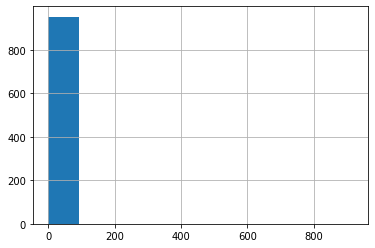

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count